In [58]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import ast

# Load the CSV file into a DataFrame
data = pd.read_csv('results50000long408t414.csv', index_col=None, header=0, engine='python')
data["hashtags"]

0                                                       []
1        [{'text': 'Canada', 'indices': [98, 105]}, {'t...
2        [{'text': 'Russia', 'indices': [44, 51]}, {'te...
3               [{'text': 'UKRAINE', 'indices': [10, 18]}]
4        [{'text': 'USA', 'indices': [11, 15]}, {'text'...
                               ...                        
50006    [{'text': 'Russia', 'indices': [75, 82]}, {'te...
50007    [{'text': 'Ukraine', 'indices': [15, 23]}, {'t...
50008    [{'text': 'Russia', 'indices': [136, 143]}, {'...
50009    [{'text': '11Abr', 'indices': [0, 6]}, {'text'...
50010    [{'text': 'Ostermaersche', 'indices': [35, 49]...
Name: hashtags, Length: 50011, dtype: object

In [59]:
def extract_hashtags(hashtags_str):
    if not hashtags_str:
        return []
    
    # Regular Expression Preprocessing
    hashtag_texts = re.findall(r"'text': '([^']+)'", hashtags_str)
    
    # Convert all hashtags to lowercase
    hashtag_texts = [hashtag.lower() for hashtag in hashtag_texts]
    
    return hashtag_texts


In [60]:
data['hashtag_texts'] = data['hashtags'].apply(extract_hashtags)
data

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,quoted_status_userid,quoted_status_username,extractedts,INSULT,TOXICITY,IDENTITY_ATTACK,SEVERE_TOXICITY,THREAT,PROFANITY,hashtag_texts
0,197098,993127212810489856,RomanMoskal70,"Цікавлюся Україною. Цікавлюся Китаєм, особливо...",м. Харків/Kharkiv,63,2432,111304,2018-05-06 13:55:53,1645781322970075136,...,0.0,NaN,2023-04-11 23:00:19.924072,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,244270,1630078764464975874,AsadElhasi90,لا اله الا انت سبحانك أني كنت من الظالمين,libya,80,11,6622,2023-02-27 05:34:04,1646996698395230209,...,0.0,NaN,2023-04-15 01:53:57.844156,0.016785,0.072128,0.041777,0.004463,0.034422,0.014088,"[canada, germany, bakhmut, kyiv, ukraine]"
2,162238,3823392983,fgafatg,NaN,"Barcelona, Països Catalans",3626,3889,127199,2015-09-30 10:46:38,1646008872509865984,...,0.0,NaN,2023-04-12 05:28:13.769648,0.019870,0.087956,0.048738,0.004635,0.024753,0.023311,"[russia, ukraine]"
3,200210,845225862,jpeter1son,Veteran denouncer of pronounced nonsense\nNot ...,"Langley, VA",4053,3513,16091,2012-09-25 10:02:32,1646462925492613121,...,0.0,NaN,2023-04-13 11:15:42.154391,0.006553,0.012755,0.004125,0.001125,0.007508,0.011356,[ukraine]
4,200417,1641117312219586564,DavidSt80377567,TRUMP 2024 \nAfter the Awakening...comes the R...,"Atlanta, GA",341,68,2448,2023-03-29 16:37:59,1645788927205466120,...,0.0,NaN,2023-04-11 15:13:06.092485,0.338892,0.351861,0.063859,0.007896,0.011586,0.098996,"[usa, nato]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50006,176462,1627943524653056002,Elmimoni1,NaN,NaN,121,17,2903,2023-02-21 08:09:30,1646817845064474624,...,0.0,NaN,2023-04-14 15:12:30.325212,0.026574,0.082417,0.028017,0.004482,0.013425,0.019349,"[russia, ukraine, america, bakhmut, trumparrai..."
50007,285401,2302714244,Artemasbohdan,A member of the Armed Forces of Ukraine 🇺🇦 Glo...,NaN,39,256,208,2014-01-21 08:11:02,1646292230599057409,...,0.0,NaN,2023-04-13 00:29:53.211600,0.010211,0.027678,0.018370,0.002337,0.009567,0.019007,"[ukraine, muslim]"
50008,234219,1483716350837243906,quequettasse,NaN,NaN,61,15,7597,2022-01-19 08:22:18,1645872211901972480,...,0.0,NaN,2023-04-11 20:12:38.131912,0.075070,0.123632,0.298926,0.078837,0.160315,0.053066,"[russia, saudiarabia]"
50009,161441,1612180935482515460,freddi27120928,NaN,NaN,320,90,8841,2023-01-08 20:14:49,1646316822017241088,...,0.0,NaN,2023-04-13 02:30:02.055715,0.006316,0.005246,0.001360,0.000467,0.005628,0.010228,"[11abr, standwithukraine]"


In [61]:
df_long = data.explode('hashtag_texts')
df_long

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,quoted_status_userid,quoted_status_username,extractedts,INSULT,TOXICITY,IDENTITY_ATTACK,SEVERE_TOXICITY,THREAT,PROFANITY,hashtag_texts
0,197098,993127212810489856,RomanMoskal70,"Цікавлюся Україною. Цікавлюся Китаєм, особливо...",м. Харків/Kharkiv,63,2432,111304,2018-05-06 13:55:53,1645781322970075136,...,0.0,NaN,2023-04-11 23:00:19.924072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,244270,1630078764464975874,AsadElhasi90,لا اله الا انت سبحانك أني كنت من الظالمين,libya,80,11,6622,2023-02-27 05:34:04,1646996698395230209,...,0.0,NaN,2023-04-15 01:53:57.844156,0.016785,0.072128,0.041777,0.004463,0.034422,0.014088,canada
1,244270,1630078764464975874,AsadElhasi90,لا اله الا انت سبحانك أني كنت من الظالمين,libya,80,11,6622,2023-02-27 05:34:04,1646996698395230209,...,0.0,NaN,2023-04-15 01:53:57.844156,0.016785,0.072128,0.041777,0.004463,0.034422,0.014088,germany
1,244270,1630078764464975874,AsadElhasi90,لا اله الا انت سبحانك أني كنت من الظالمين,libya,80,11,6622,2023-02-27 05:34:04,1646996698395230209,...,0.0,NaN,2023-04-15 01:53:57.844156,0.016785,0.072128,0.041777,0.004463,0.034422,0.014088,bakhmut
1,244270,1630078764464975874,AsadElhasi90,لا اله الا انت سبحانك أني كنت من الظالمين,libya,80,11,6622,2023-02-27 05:34:04,1646996698395230209,...,0.0,NaN,2023-04-15 01:53:57.844156,0.016785,0.072128,0.041777,0.004463,0.034422,0.014088,kyiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50008,234219,1483716350837243906,quequettasse,NaN,NaN,61,15,7597,2022-01-19 08:22:18,1645872211901972480,...,0.0,NaN,2023-04-11 20:12:38.131912,0.075070,0.123632,0.298926,0.078837,0.160315,0.053066,saudiarabia
50009,161441,1612180935482515460,freddi27120928,NaN,NaN,320,90,8841,2023-01-08 20:14:49,1646316822017241088,...,0.0,NaN,2023-04-13 02:30:02.055715,0.006316,0.005246,0.001360,0.000467,0.005628,0.010228,11abr
50009,161441,1612180935482515460,freddi27120928,NaN,NaN,320,90,8841,2023-01-08 20:14:49,1646316822017241088,...,0.0,NaN,2023-04-13 02:30:02.055715,0.006316,0.005246,0.001360,0.000467,0.005628,0.010228,standwithukraine
50010,145174,1284874531434377224,SandauMatthias,Fotograf. Filmemacher. Musiker. Lehrer. Träume...,Hildesheim / Bad Reichenhall,210,43,2653,2020-07-19 15:35:45,1644957807416864770,...,0.0,NaN,2023-04-09 07:51:27.274716,0.594174,0.637038,0.739489,0.354086,0.855204,0.484889,ostermaersche


In [62]:
grouped = df_long.groupby('hashtag_texts').agg(
    count=pd.NamedAgg(column='hashtags', aggfunc='count'),
    avg_identity_attack=pd.NamedAgg(column='IDENTITY_ATTACK', aggfunc='mean'),
    avg_severe_toxicity=pd.NamedAgg(column='SEVERE_TOXICITY', aggfunc='mean'),
    avg_insult=pd.NamedAgg(column='INSULT', aggfunc='mean'),
    avg_toxicity=pd.NamedAgg(column='TOXICITY', aggfunc='mean'),
    avg_profanity=pd.NamedAgg(column='PROFANITY', aggfunc='mean'),
    avg_threat=pd.NamedAgg(column='THREAT', aggfunc='mean')
)

# Reset the index to move 'hashtag_texts' back to a column
grouped = grouped.reset_index()
grouped_sorted = grouped.sort_values('count', ascending=False)
grouped

,hashtag_texts,count,avg_identity_attack,avg_severe_toxicity,avg_insult,avg_toxicity,avg_profanity,avg_threat
0,08h15,1,0.022992,0.012436,0.065298,0.094817,0.014977,0.010628
1,08thapril,1,0.042035,0.009270,0.034562,0.057995,0.038906,0.023717
2,09aprile,1,0.032238,0.003052,0.025671,0.062236,0.021262,0.010007
3,0softwareengineering,1,0.002867,0.000930,0.006487,0.008545,0.013405,0.006965
4,1000x,2,0.003210,0.003204,0.008947,0.016367,0.018119,0.007249
...,...,...,...,...,...,...,...,...
20888,３ｄシール,1,0.000421,0.000219,0.005214,0.001893,0.009571,0.005320
20889,ｎａｔｏ,2,0.007326,0.002012,0.011503,0.014074,0.014464,0.006816
20890,𝒟𝒾𝑒𝒷𝒪1,1,0.006438,0.002136,0.010477,0.024732,0.019964,0.008945
20891,𝒟𝒾𝑒𝒷𝒪37,1,0.006438,0.002136,0.010477,0.024732,0.019964,0.008945


In [63]:
# Step 1: Filter the DataFrame for rows with a count of 20 or more.
filtered_grouped = grouped[grouped['count'] >= 50]

# Step 2: Create a new column called 'overlap_count' that counts how many categories have non-zero values.
categories = ['avg_identity_attack', 'avg_severe_toxicity', 'avg_insult', 'avg_toxicity', 'avg_profanity', 'avg_threat']
filtered_grouped['overlap_count'] = filtered_grouped[categories].gt(0).sum(axis=1)

# Step 3: Filter the DataFrame for rows with an overlap_count greater than 1.
filtered_grouped = filtered_grouped[filtered_grouped['overlap_count'] > 1]

filtered_grouped.head()
filtered_grouped

/var/folders/l6/gg22yf1j64zgklq5qqv9httm0000gn/T/ipykernel_88970/3873977286.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_grouped['overlap_count'] = filtered_grouped[categories].gt(0).sum(axis=1)


,hashtag_texts,count,avg_identity_attack,avg_severe_toxicity,avg_insult,avg_toxicity,avg_profanity,avg_threat,overlap_count
226,80s,87,0.004594,0.005150,0.009664,0.019926,0.037810,0.007257,6
423,aespa,69,0.029344,0.007775,0.032625,0.056794,0.028821,0.018003,6
444,afghanistan,65,0.089869,0.017382,0.064917,0.117501,0.043834,0.041601,6
453,africa,107,0.084786,0.028508,0.059344,0.103737,0.046513,0.032345,6
814,america,1494,0.084108,0.022050,0.084855,0.146360,0.062642,0.065564,6
...,...,...,...,...,...,...,...,...,...
20313,امر_ملكي,75,0.039016,0.017033,0.040576,0.071563,0.047630,0.022078,6
20390,دوري_أبطال_أوروبا,57,0.049889,0.031583,0.049888,0.091722,0.075625,0.028175,6
20426,شہادتِ_امیرالمومنین_امام_علیؑ,68,0.041976,0.008755,0.034588,0.071880,0.044771,0.031048,6
20620,ウクライナ,63,0.282169,0.197012,0.212372,0.277214,0.139235,0.231813,6


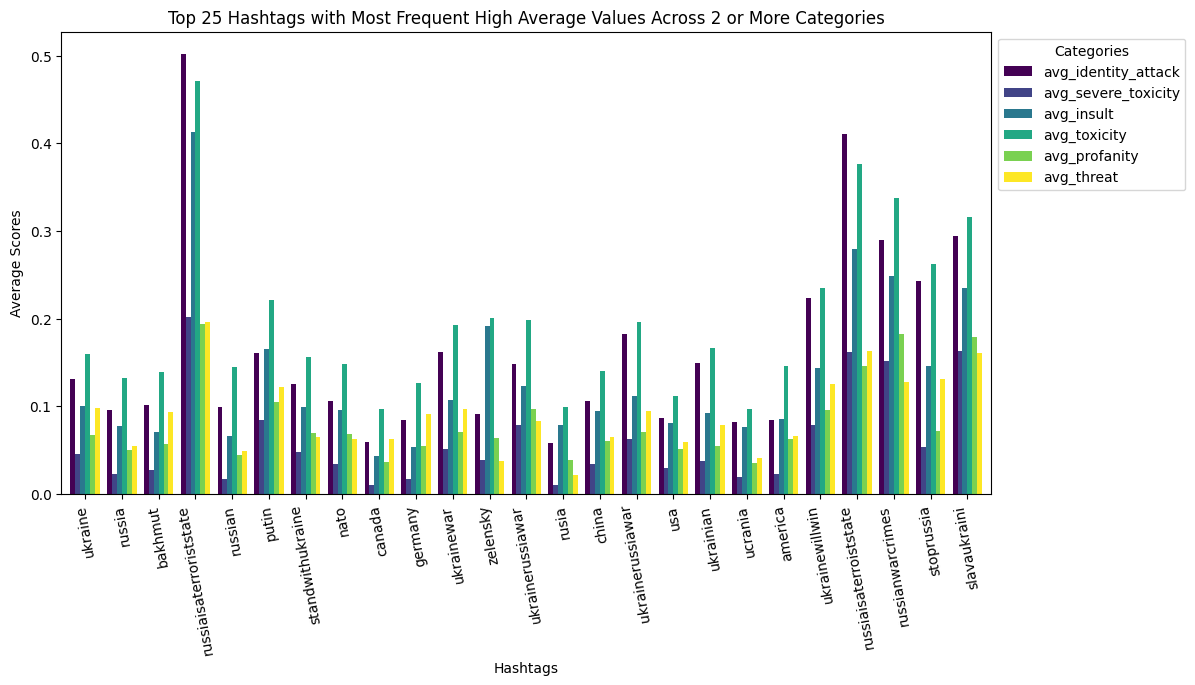

In [85]:
# Find the top 10 frequent high-value hashtags
top_25_frequent_high_value_hashtags = filtered_grouped.loc[filtered_grouped['count'] >= 2].nlargest(25, 'count')

# Plot a bar chart
ax = top_25_frequent_high_value_hashtags[categories].plot.bar(figsize=(12, 6), cmap='viridis', width=0.8)
plt.title('Top 25 Hashtags with Most Frequent High Average Values Across 2 or More Categories')
plt.xlabel('Hashtags')
plt.ylabel('Average Scores')

ax.set_xticklabels(top_25_frequent_high_value_hashtags['hashtag_texts'], rotation=100)

plt.legend(categories, title='Categories', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

In [71]:
wanted_features = ["hashtag_texts", "count", "avg_identity_attack", "avg_severe_toxicity", "avg_insult", "avg_toxicity", "avg_profanity", "avg_threat"]
changed_25_df = top_25_frequent_high_value_hashtags[wanted_features]
changed_25_df.to_csv("50kTop25HashtagsMostFreqHighAverage.csv")
changed_25_df

,hashtag_texts,count,avg_identity_attack,avg_severe_toxicity,avg_insult,avg_toxicity,avg_profanity,avg_threat
17863,ukraine,19672,0.130684,0.045753,0.100716,0.159442,0.067060,0.097587
14784,russia,8864,0.096008,0.022555,0.076821,0.132257,0.049635,0.055018
1671,bakhmut,4282,0.101297,0.026842,0.070200,0.138827,0.057013,0.093171
14832,russiaisaterroriststate,3154,0.502365,0.202030,0.412994,0.471626,0.194335,0.196083
14856,russian,3079,0.099279,0.017181,0.066296,0.145180,0.043763,0.048543
13857,putin,3025,0.160265,0.083876,0.164672,0.221547,0.105163,0.121618
16189,standwithukraine,2778,0.125369,0.047569,0.098681,0.155741,0.069156,0.064256
11657,nato,2545,0.105604,0.033592,0.095403,0.148445,0.068340,0.062645
2840,canada,2535,0.058505,0.010519,0.043273,0.096620,0.036417,0.062746
7108,germany,2292,0.084227,0.016811,0.053458,0.126370,0.054228,0.090887


In [66]:
# Replace 'your_hashtag' with the hashtag you're interested in
selected_hashtag = 'ukraine'

# Filter the exploded DataFrame to keep only rows with the selected hashtag
filtered_df = df_long[df_long['hashtag_texts'] == selected_hashtag]

# Show the first few rows of the filtered DataFrame
# List the column names you want to select
selected_columns = ['username', 'text', 'hashtag_texts','TOXICITY']

# Select the specified columns from the filtered_df DataFrame
filtered_df_selected_columns = filtered_df[selected_columns]

# Set the threshold for the Perspective API score you want to filter by
toxicity_threshold = 0.5  # Replace this value with your desired threshold

# Filter the DataFrame to keep only rows with a TOXICITY score above the threshold
filtered_df_high_toxicity = filtered_df_selected_columns[filtered_df_selected_columns['TOXICITY'] > toxicity_threshold]

sorted_df = filtered_df_high_toxicity.sort_values(by='TOXICITY', ascending=False)


# Show the first few rows of the new DataFrame with selected columns
sorted_df.to_csv('ukraineRankingTOX.csv', index=False)
print(sorted_df.head())



             username                                               text  \
38775    FuckPutinBot  Vá se foder, Putin!\n(Portuguese)\n\n#FuckPuti...   
21729    FuckPutinBot  Vá se foder, Putin!\n(Portuguese)\n\n#RussiaWa...   
24356    FuckPutinBot  Vá se foder, Putin!\n(Portuguese)\n\n#StandWit...   
4892         Jaccuse1  You're a fucking idiot if you vote for a pro-#...   
48574  madamefoxglove  You're a fucking idiot if you vote for a pro-#...   

      hashtag_texts  TOXICITY  
38775       ukraine  0.982097  
21729       ukraine  0.982097  
24356       ukraine  0.975323  
4892        ukraine  0.960691  
48574       ukraine  0.960691  


In [39]:

# Replace 'username_to_drop' with the username you want to remove
username_to_drop = 'FuckPutinBot'

# Create a new DataFrame without rows containing the specified username
no_putin_bot_df = df_long[df_long['username'] != username_to_drop]

# Show the first few rows of the new DataFrame
(no_putin_bot_df)


grouped2 = no_putin_bot_df.groupby('hashtag_texts').agg(
    count=pd.NamedAgg(column='hashtags', aggfunc='count'),
    avg_identity_attack=pd.NamedAgg(column='IDENTITY_ATTACK', aggfunc='mean'),
    avg_severe_toxicity=pd.NamedAgg(column='SEVERE_TOXICITY', aggfunc='mean'),
    avg_insult=pd.NamedAgg(column='INSULT', aggfunc='mean'),
    avg_toxicity=pd.NamedAgg(column='TOXICITY', aggfunc='mean'),
    avg_profanity=pd.NamedAgg(column='PROFANITY', aggfunc='mean'),
    avg_threat=pd.NamedAgg(column='THREAT', aggfunc='mean')
)

# Reset the index to move 'hashtag_texts' back to a column
grouped2 = grouped2.reset_index()
grouped_sorted2 = grouped2.sort_values('count', ascending=False)
grouped2

# Step 1: Filter the DataFrame for rows with a count of 20 or more.
filtered_grouped2 = grouped2[grouped2['count'] >= 50]

# Step 2: Create a new column called 'overlap_count' that counts how many categories have non-zero values.
categories2 = ['avg_identity_attack', 'avg_severe_toxicity', 'avg_insult', 'avg_toxicity', 'avg_profanity', 'avg_threat']
filtered_grouped2['overlap_count'] = filtered_grouped2[categories2].gt(0).sum(axis=1)

# Step 3: Filter the DataFrame for rows with an overlap_count greater than 1.
filtered_grouped2 = filtered_grouped2[filtered_grouped2['overlap_count'] > 1]

filtered_grouped2.head()
filtered_grouped2


/var/folders/l6/gg22yf1j64zgklq5qqv9httm0000gn/T/ipykernel_88970/2666110913.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_grouped2['overlap_count'] = filtered_grouped2[categories2].gt(0).sum(axis=1)


,hashtag_texts,count,avg_identity_attack,avg_severe_toxicity,avg_insult,avg_toxicity,avg_profanity,avg_threat,overlap_count
25,100daysofcode,99,0.007563,0.004225,0.015277,0.028404,0.031040,0.009786,6
656,4mei,88,0.026529,0.044880,0.103583,0.112808,0.075889,0.014734,6
706,5mei,55,0.019597,0.021491,0.068017,0.067888,0.052070,0.006813,6
742,71stmissuniverse,150,0.039464,0.015050,0.055851,0.089543,0.064048,0.019196,6
749,7maggio,166,0.010294,0.003439,0.015259,0.030370,0.022419,0.012487,6
...,...,...,...,...,...,...,...,...,...
64144,韓国,103,0.235006,0.209013,0.160331,0.227502,0.156212,0.154931,6
64191,로제,58,0.013082,0.007629,0.027314,0.060932,0.058343,0.012756,6
64192,리사,58,0.011951,0.007035,0.027175,0.062258,0.059236,0.009842,6
64249,제니,60,0.012255,0.007124,0.029809,0.065088,0.060377,0.010392,6


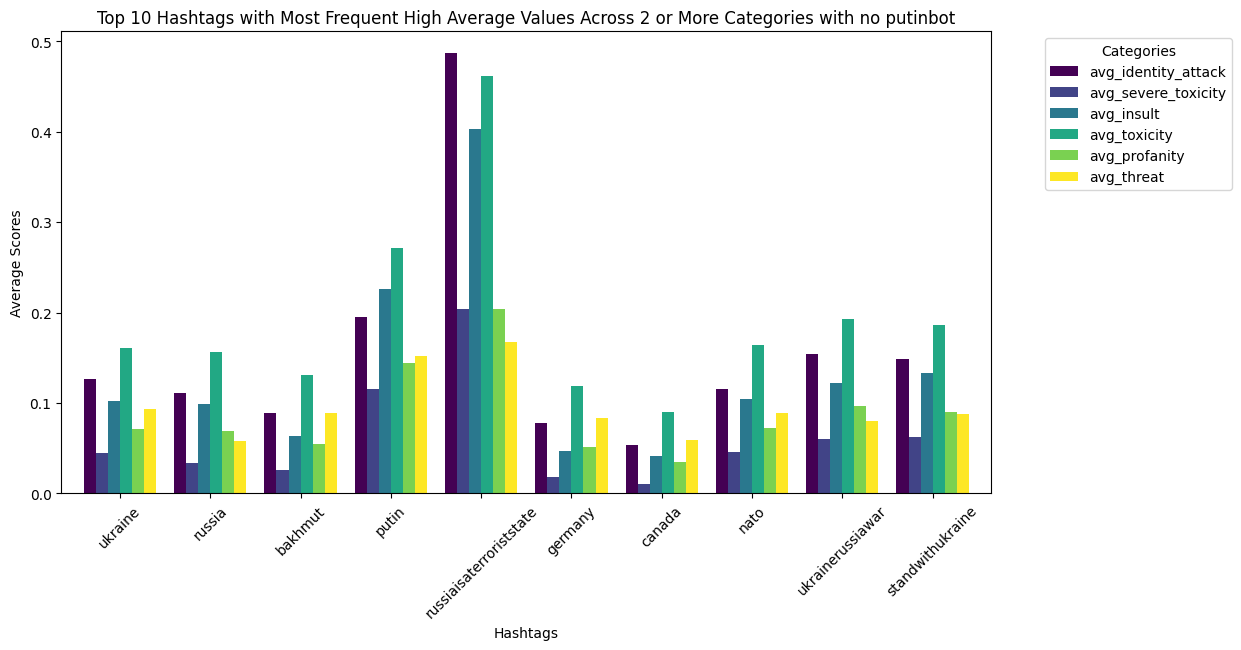

In [67]:
# Find the top 5 frequent high-value hashtags
top_10_frequent_high_value_hashtags2 = filtered_grouped2.loc[filtered_grouped2['count'] >= 2].nlargest(10, 'count')

# Plot a bar chart
ax = top_10_frequent_high_value_hashtags2[categories2].plot.bar(figsize=(12, 6), cmap='viridis', width=0.8)
plt.title('Top 10 Hashtags with Most Frequent High Average Values Across 2 or More Categories with no putinbot')
plt.xlabel('Hashtags')
plt.ylabel('Average Scores')

ax.set_xticklabels(top_10_frequent_high_value_hashtags2['hashtag_texts'], rotation=45)

plt.legend(categories2, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [68]:
## Replace 'your_hashtag' with the hashtag you're interested in
selected_hashtag = 'ukraine'

# Filter the exploded DataFrame to keep only rows with the selected hashtag
filtered_df2 = no_putin_bot_df[no_putin_bot_df['hashtag_texts'] == selected_hashtag]

# Show the first few rows of the filtered DataFrame
# List the column names you want to select
selected_columns2 = ['username', 'text', 'hashtag_texts','TOXICITY']

# Select the specified columns from the filtered_df DataFrame
filtered_df_selected_columns2 = filtered_df2[selected_columns2]

# Set the threshold for the Perspective API score you want to filter by
toxicity_threshold = 0.5  # Replace this value with your desired threshold

# Filter the DataFrame to keep only rows with a TOXICITY score above the threshold
filtered_df_high_toxicity2 = filtered_df_selected_columns2[filtered_df_selected_columns2['TOXICITY'] > toxicity_threshold]

sorted_df2 = filtered_df_high_toxicity2.sort_values(by='TOXICITY', ascending=False)


# Show the first few rows of the new DataFrame with selected columns
sorted_df2.to_csv('ukraineRankingTOX2.csv', index=False)
print(sorted_df2.head())

               username                                               text  \
66673     alleswisser39  @MelnykAndrij @ntvde Verpisse dich endlich, du...   
139983   PolitscherBlog  Really ??? Wie kann man nur so naiv sein und d...   
62122       DemoDavidLE  Zur Zeit blockiere ich übrigens sehr gerne lin...   
52914   James0027705762  #Ukraine #XI warnt vor einer Eskalation,mehr e...   
43910       alexbonness  Die @jungewelt völlig am Arsch!\n\n#Holodomer ...   

       hashtag_texts  TOXICITY  
66673        ukraine  0.981511  
139983       ukraine  0.976698  
62122        ukraine  0.956299  
52914        ukraine  0.943225  
43910        ukraine  0.943225  


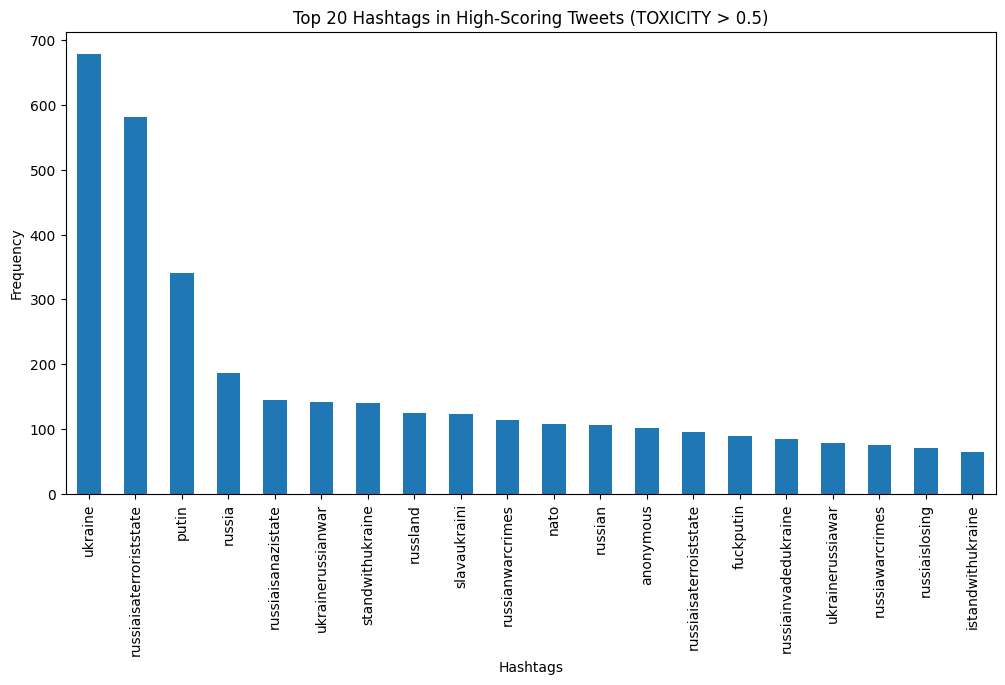

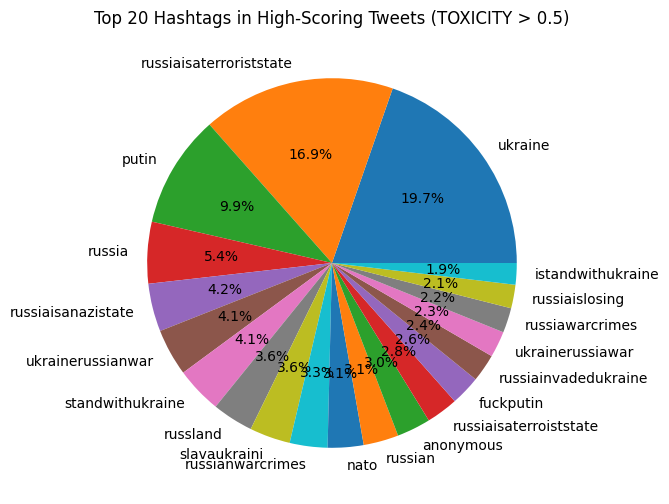

In [86]:
import matplotlib.pyplot as plt

# Set the threshold for high-scoring tweets
toxicity_threshold = 0.5

# Filter the DataFrame to keep only high-scoring tweets
high_toxicity_df = df_long[df_long['TOXICITY'] > toxicity_threshold]

# Count the occurrences of each hashtag in the filtered DataFrame
hashtag_counts = high_toxicity_df['hashtag_texts'].value_counts()

# Select the top N hashtags to visualize
top_n = 20
top_hashtags = hashtag_counts.head(top_n)

# Visualize the results using a bar chart
plt.figure(figsize=(12, 6))
top_hashtags.plot(kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Hashtags in High-Scoring Tweets (TOXICITY > {toxicity_threshold})')
plt.show()

# Visualize the results using a pie chart
plt.figure(figsize=(10, 6))
top_hashtags.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title(f'Top {top_n} Hashtags in High-Scoring Tweets (TOXICITY > {toxicity_threshold})')
plt.show()

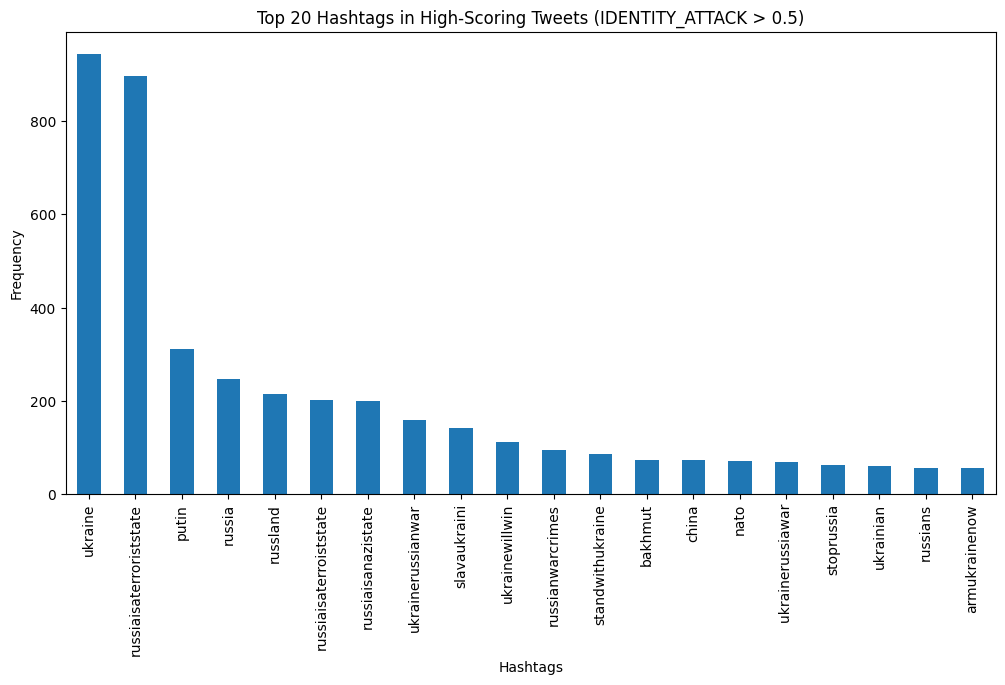

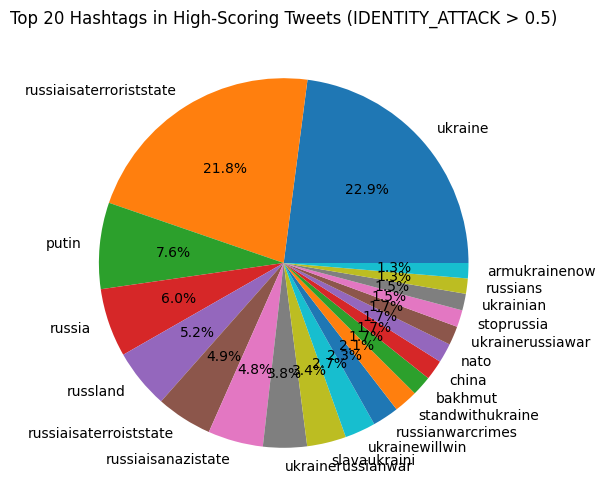

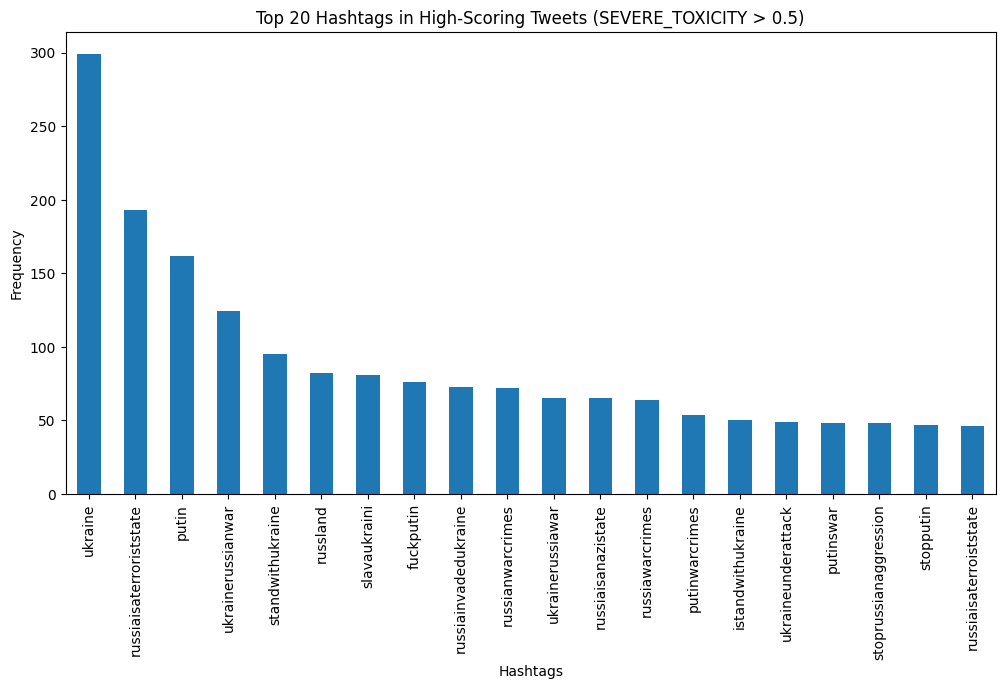

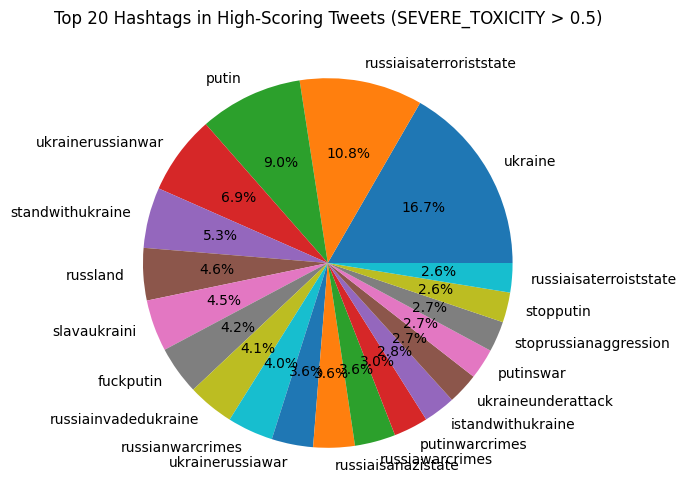

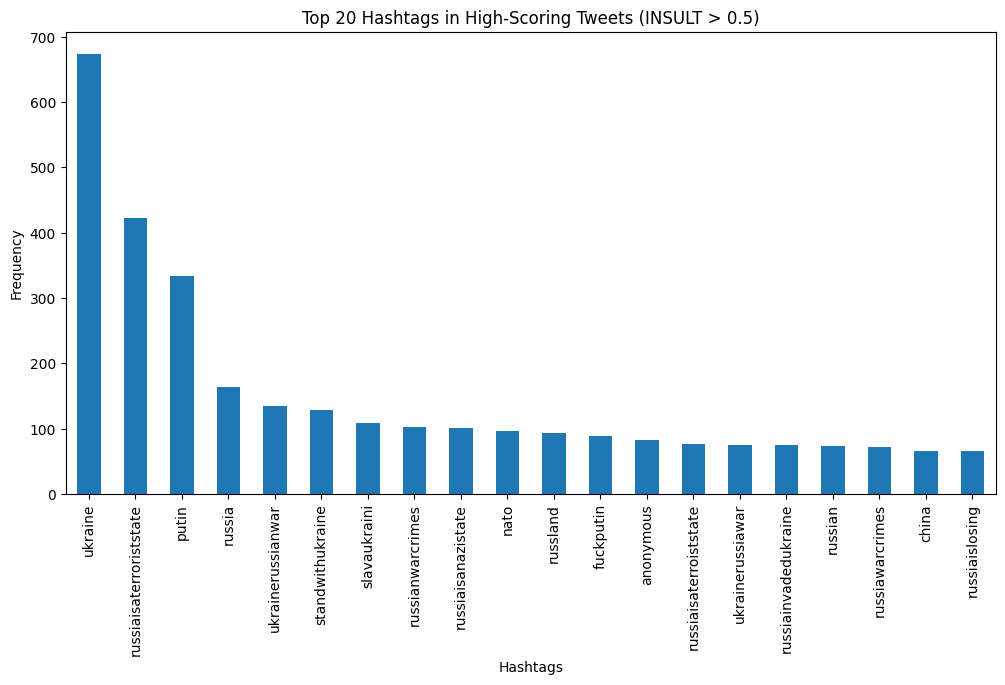

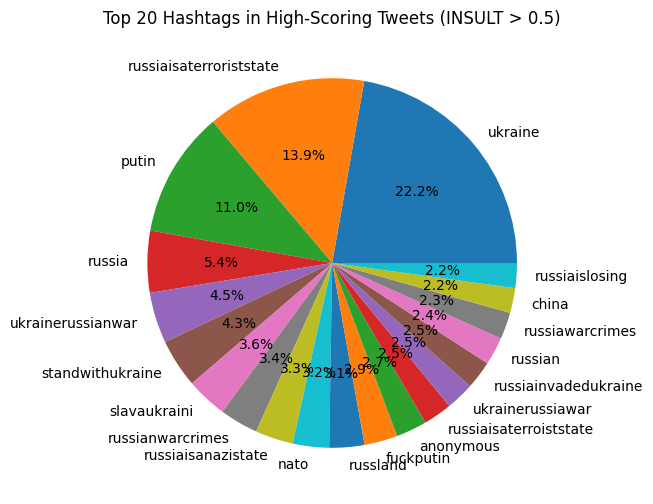

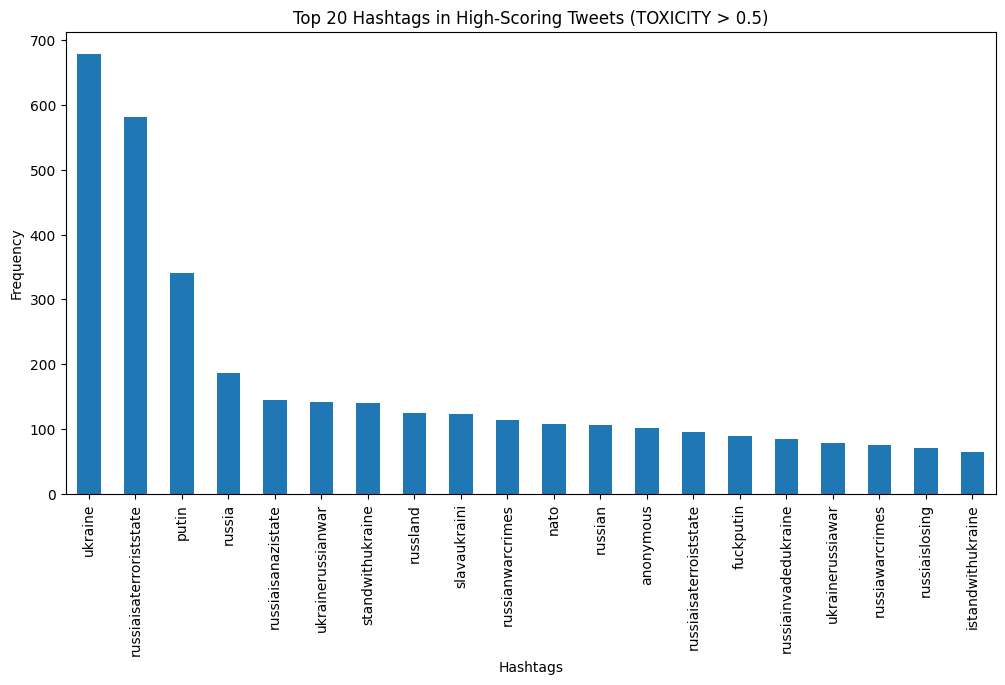

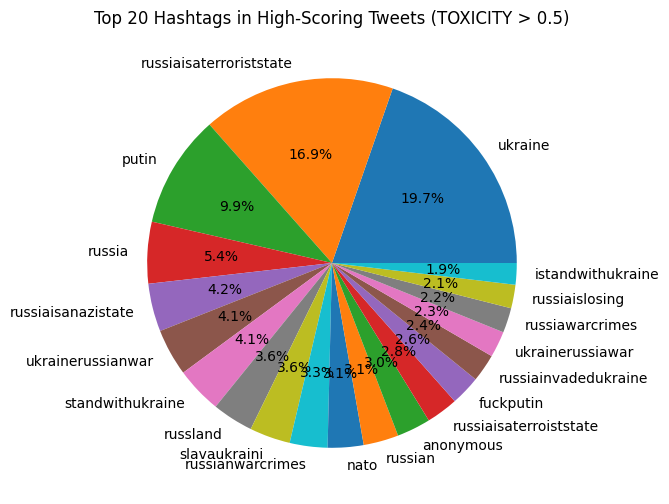

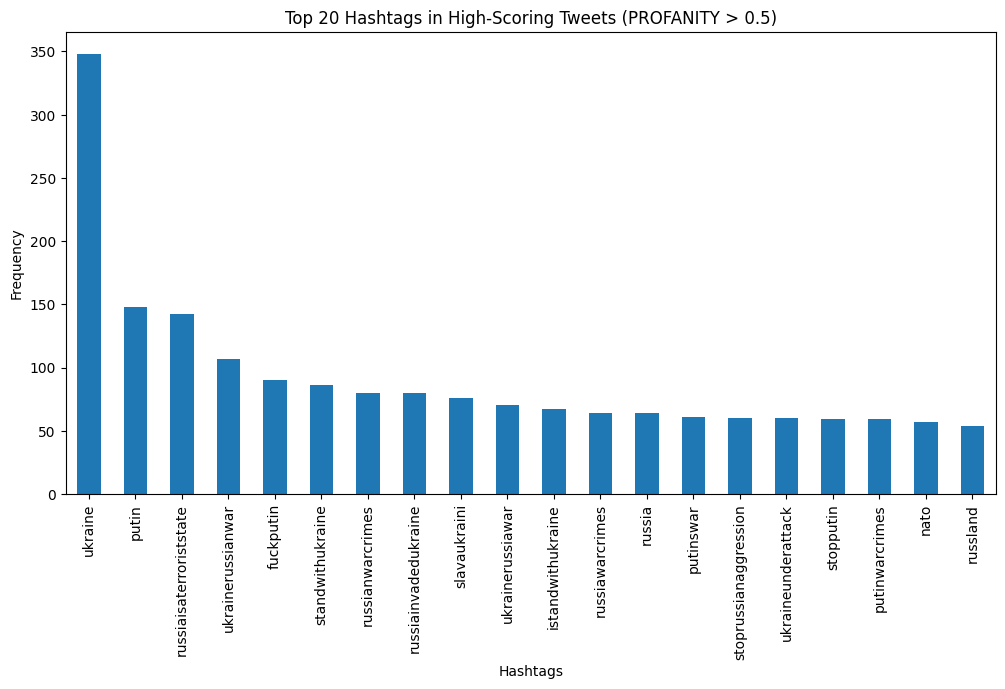

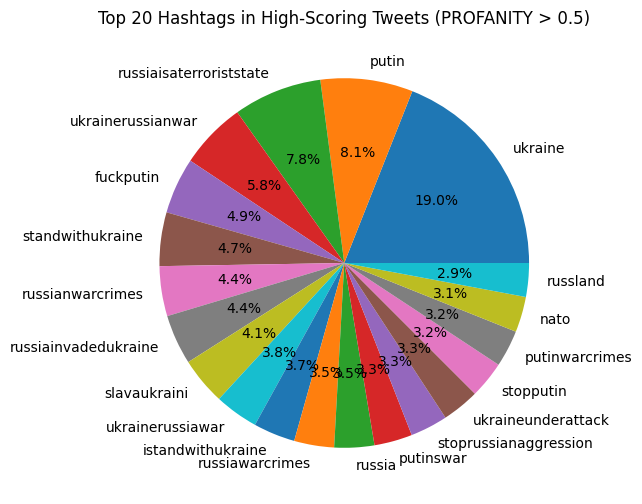

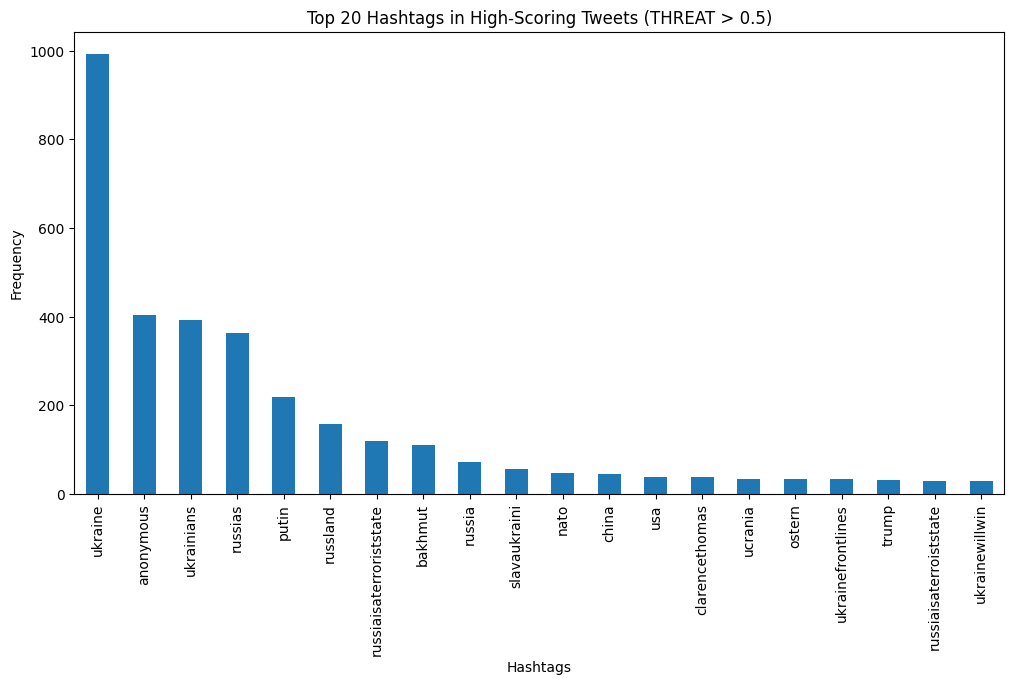

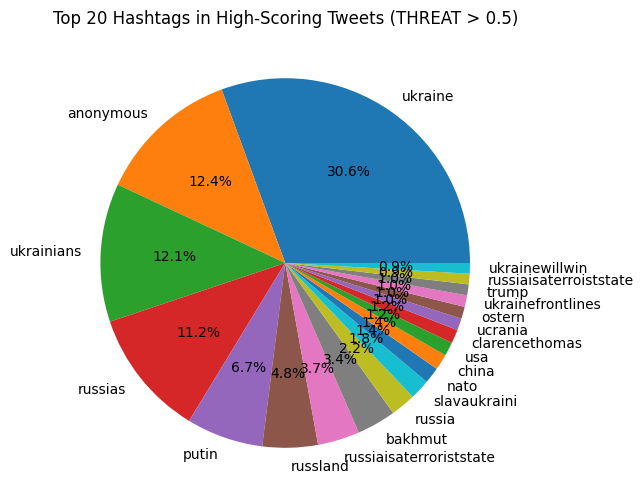

In [87]:
import matplotlib.pyplot as plt

# Set the threshold for high-scoring tweets
threshold = 0.5

# List of Perspective API attributes
attributes = ['IDENTITY_ATTACK', 'SEVERE_TOXICITY', 'INSULT', 'TOXICITY', 'PROFANITY', 'THREAT']

# Iterate through the Perspective API attributes
for attribute in attributes:
    # Filter the DataFrame to keep only high-scoring tweets
    high_score_df = df_long[df_long[attribute] > threshold]

    # Count the occurrences of each hashtag in the filtered DataFrame
    hashtag_counts = high_score_df['hashtag_texts'].value_counts()

    # Select the top N hashtags to visualize
    top_n = 20
    top_hashtags = hashtag_counts.head(top_n)

    # Visualize the results using a bar chart
    plt.figure(figsize=(12, 6))
    top_hashtags.plot(kind='bar')
    plt.xlabel('Hashtags')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Hashtags in High-Scoring Tweets ({attribute} > {threshold})')
    plt.show()

    # Visualize the results using a pie chart
    plt.figure(figsize=(10, 6))
    top_hashtags.plot(kind='pie', autopct='%1.1f%%')
    plt.ylabel('')
    plt.title(f'Top {top_n} Hashtags in High-Scoring Tweets ({attribute} > {threshold})')
    plt.show()


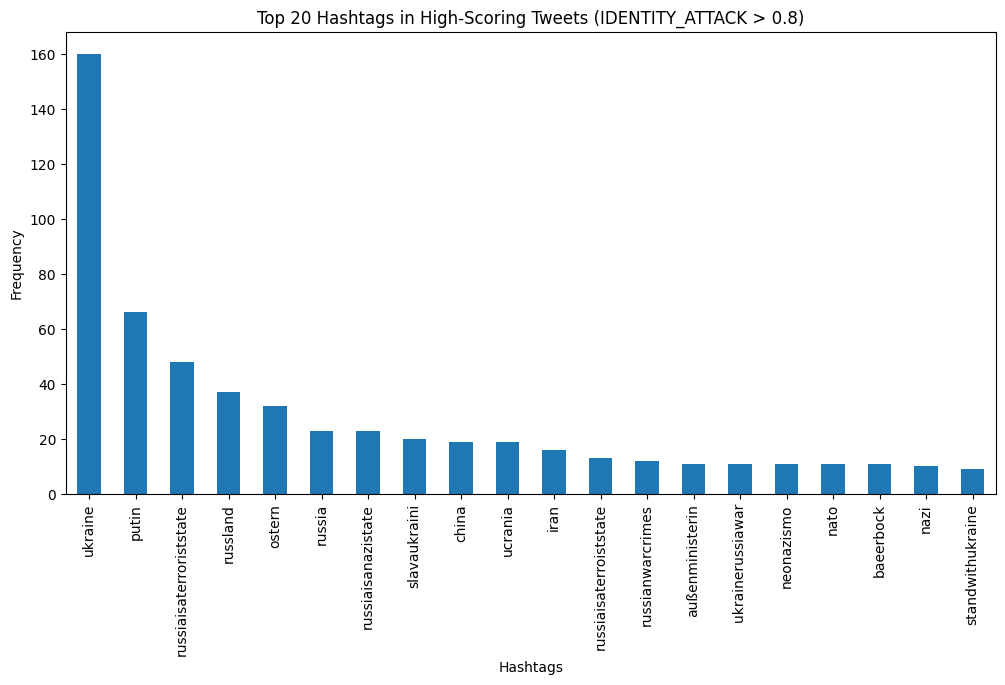

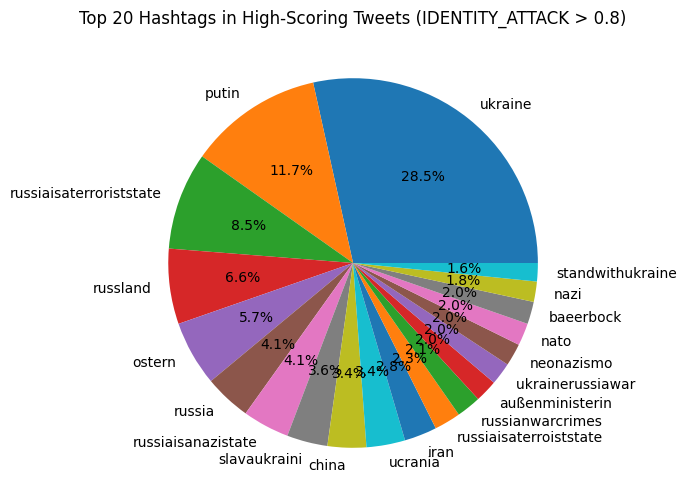

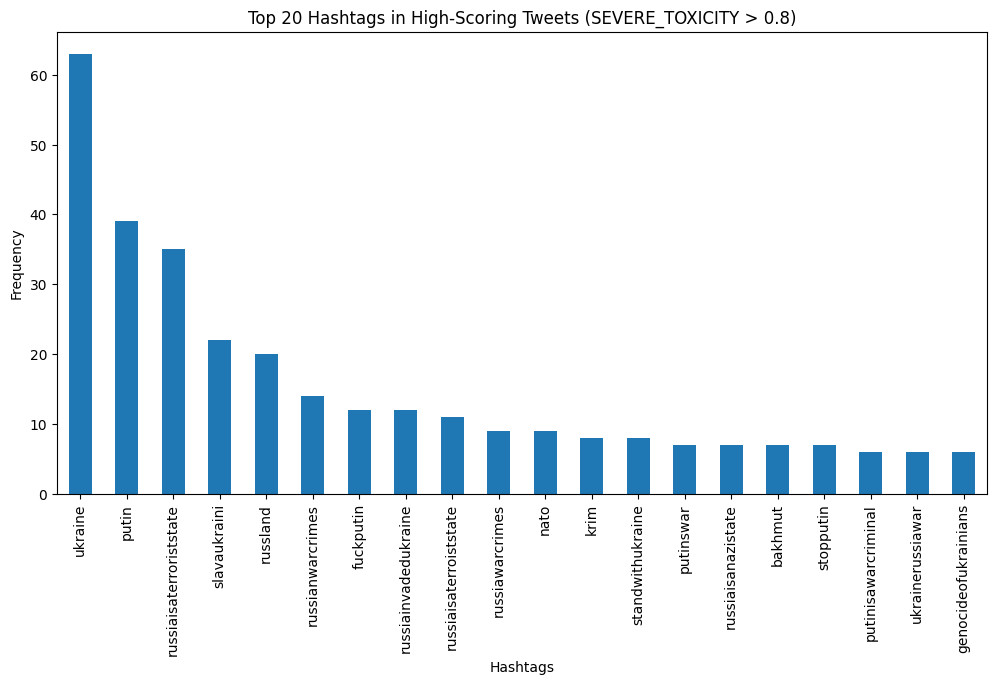

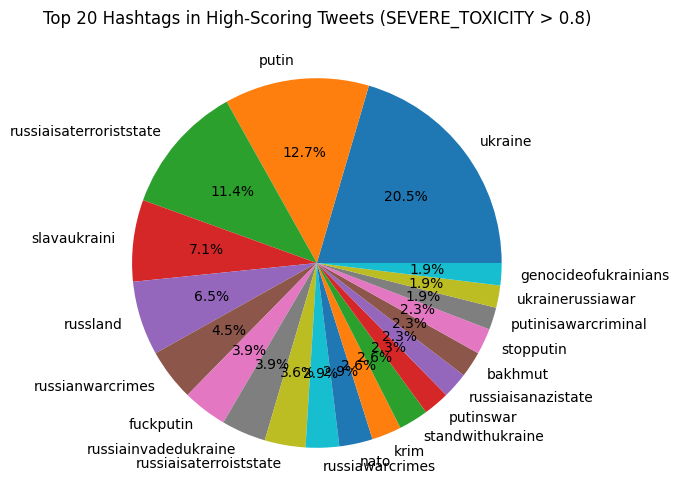

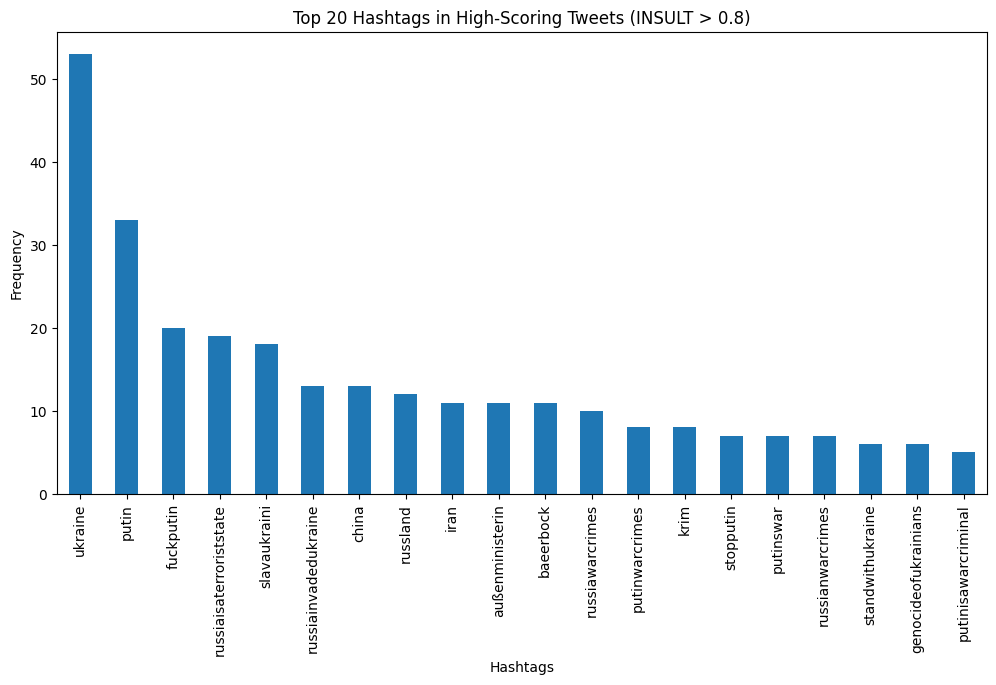

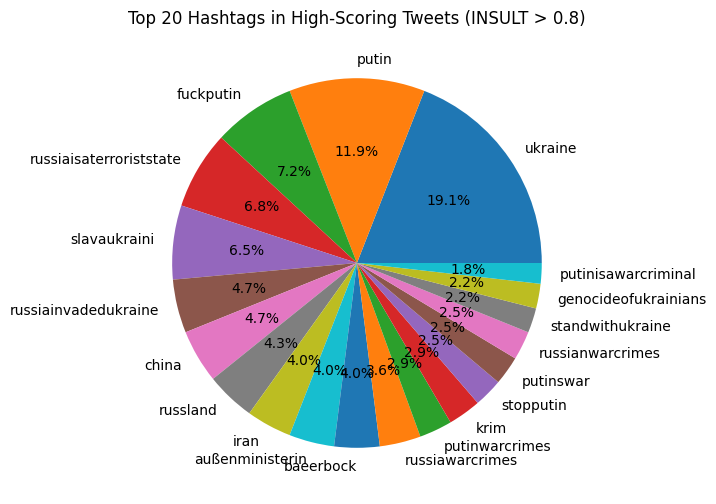

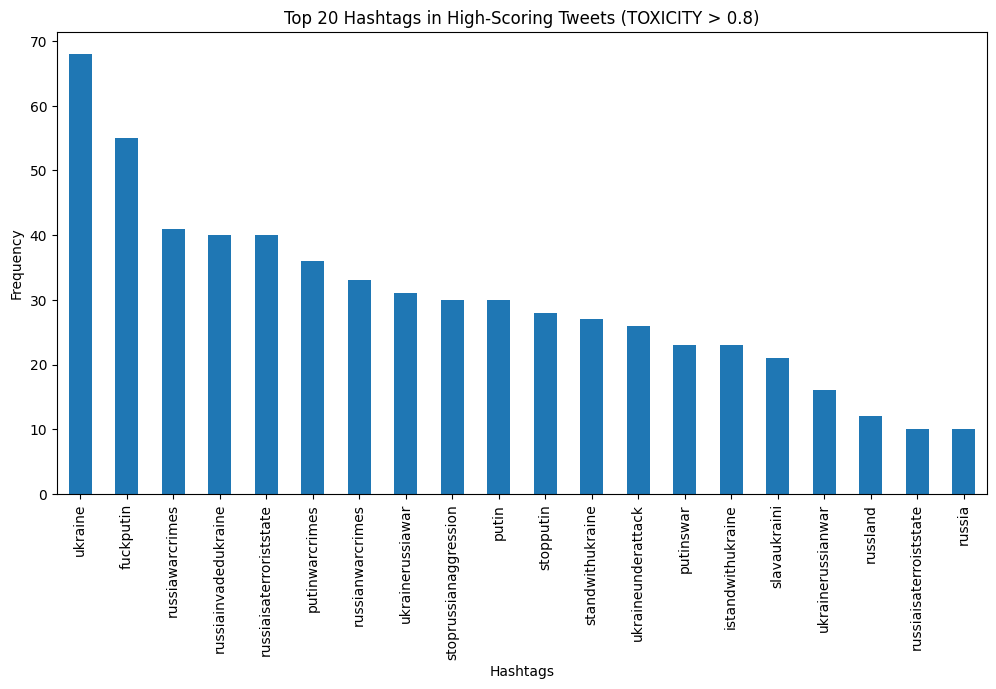

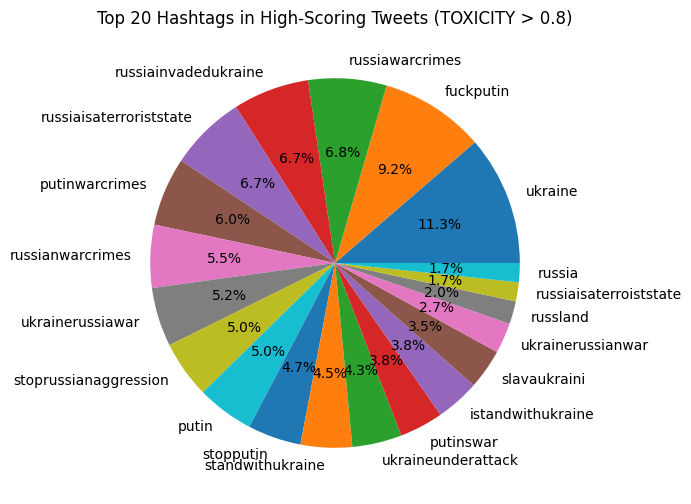

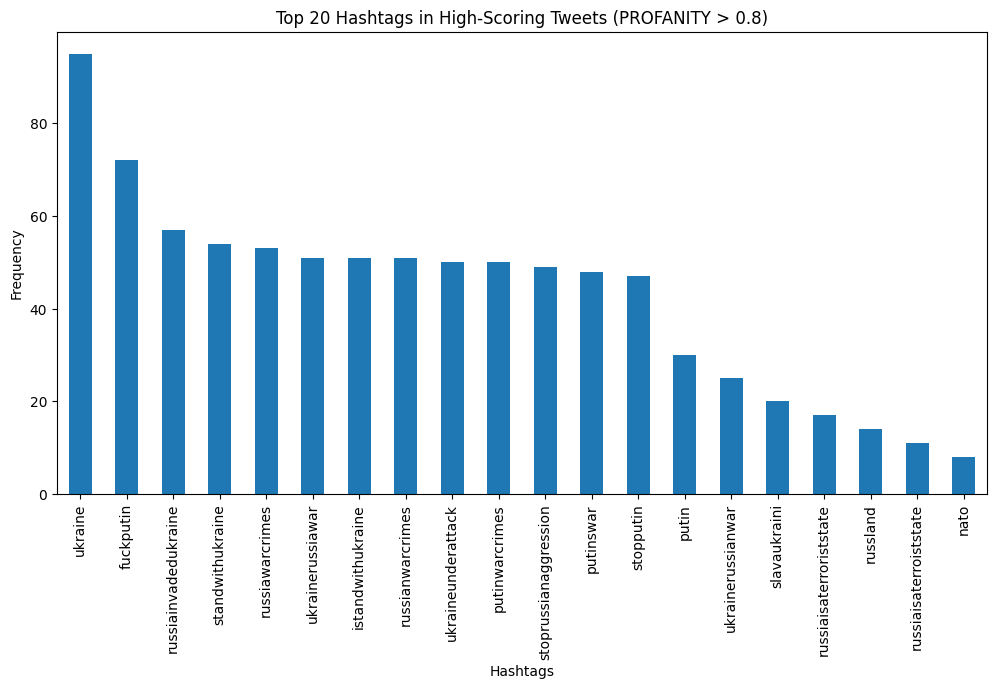

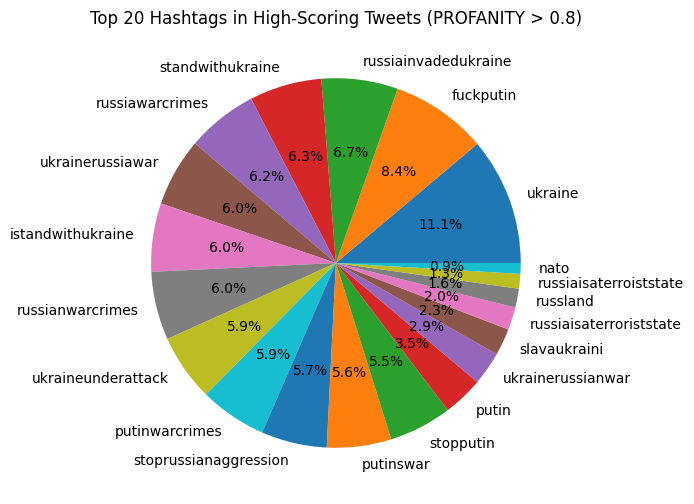

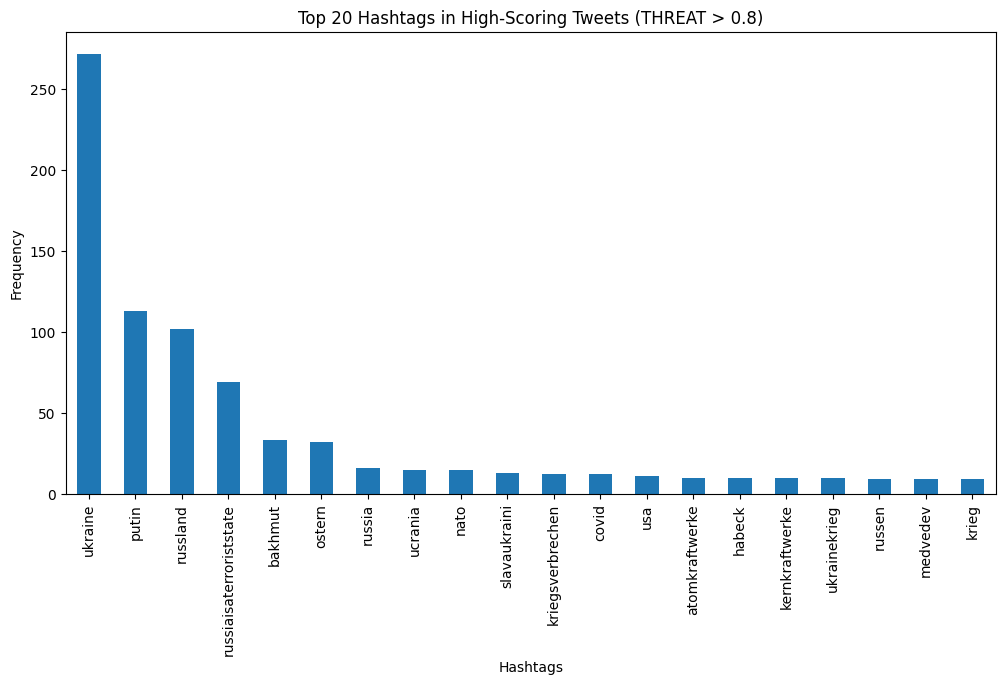

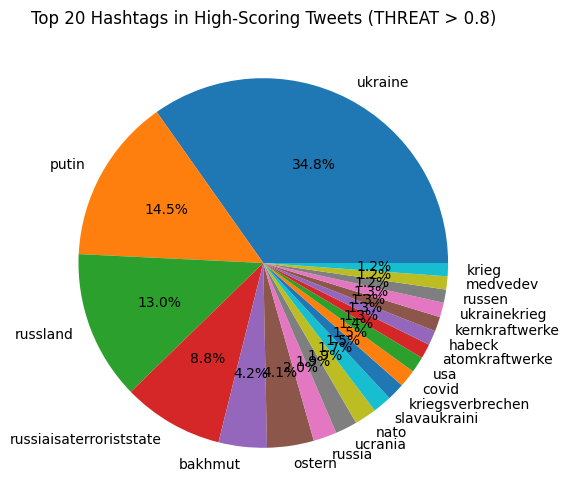

In [88]:
import matplotlib.pyplot as plt

# Set the threshold for high-scoring tweets
threshold = 0.8

# List of Perspective API attributes
attributes = ['IDENTITY_ATTACK', 'SEVERE_TOXICITY', 'INSULT', 'TOXICITY', 'PROFANITY', 'THREAT']

# Iterate through the Perspective API attributes
for attribute in attributes:
    # Filter the DataFrame to keep only high-scoring tweets
    high_score_df = df_long[df_long[attribute] > threshold]

    # Count the occurrences of each hashtag in the filtered DataFrame
    hashtag_counts = high_score_df['hashtag_texts'].value_counts()

    # Select the top N hashtags to visualize
    top_n = 20
    top_hashtags = hashtag_counts.head(top_n)

    # Visualize the results using a bar chart
    plt.figure(figsize=(12, 6))
    top_hashtags.plot(kind='bar')
    plt.xlabel('Hashtags')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Hashtags in High-Scoring Tweets ({attribute} > {threshold})')
    plt.show()

    # Visualize the results using a pie chart
    plt.figure(figsize=(10, 6))
    top_hashtags.plot(kind='pie', autopct='%1.1f%%')
    plt.ylabel('')
    plt.title(f'Top {top_n} Hashtags in High-Scoring Tweets ({attribute} > {threshold})')
    plt.show()


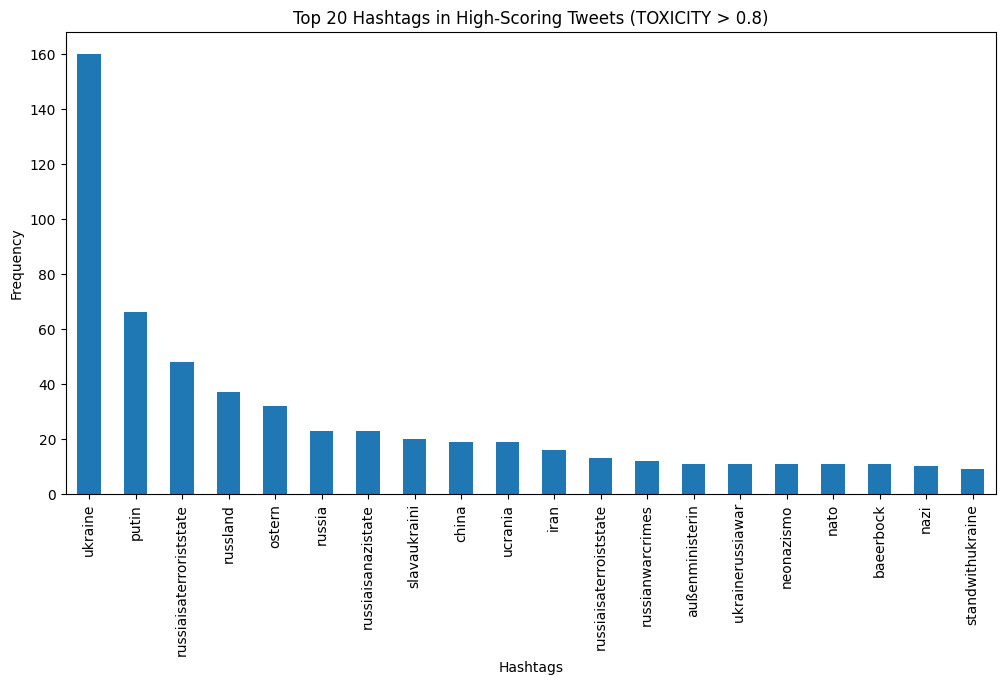

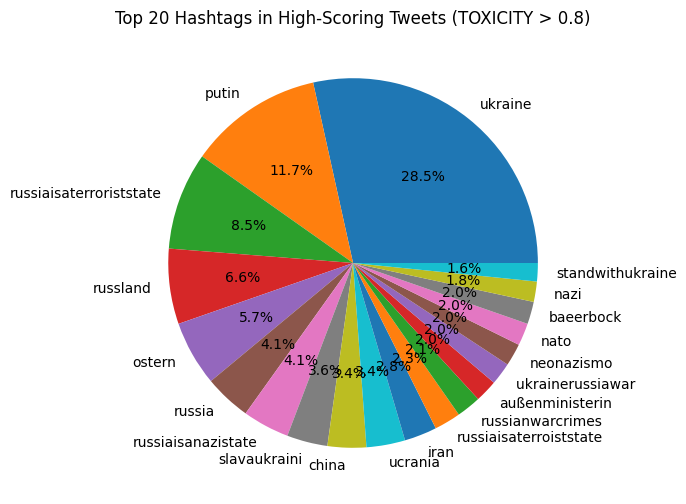

In [114]:
import matplotlib.pyplot as plt

# Set the threshold for high-scoring tweets
toxicity_threshold = 0.8

# Filter the DataFrame to keep only high-scoring tweets
high_toxicity_df = df_long[df_long['IDENTITY_ATTACK'] > toxicity_threshold]

# Count the occurrences of each hashtag in the filtered DataFrame
hashtag_counts = high_toxicity_df['hashtag_texts'].value_counts()

# Select the top N hashtags to visualize
top_n = 20
top_hashtags = hashtag_counts.head(top_n)

# Visualize the results using a bar chart
plt.figure(figsize=(12, 6))
top_hashtags.plot(kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Hashtags in High-Scoring Tweets (TOXICITY > {toxicity_threshold})')
plt.show()

# Visualize the results using a pie chart
plt.figure(figsize=(10, 6))
top_hashtags.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title(f'Top {top_n} Hashtags in High-Scoring Tweets (TOXICITY > {toxicity_threshold})')
plt.show()

In [115]:
top_hashtags

ukraine                    160
putin                       66
russiaisaterroriststate     48
russland                    37
ostern                      32
russia                      23
russiaisanazistate          23
slavaukraini                20
china                       19
ucrania                     19
iran                        16
russiaisaterroiststate      13
russianwarcrimes            12
außenministerin             11
ukrainerussiawar️           11
neonazismo                  11
nato                        11
baeerbock                   11
nazi                        10
standwithukraine             9
Name: hashtag_texts, dtype: int64